In [5]:
import pandas as pd
import matplotlib.pyplot as plt
loan_df = pd.read_csv(r'C:/Users/kbhosale/Desktop/Kunal/career/AIAndML/CaseStudy/LendingClub/loan/loan.csv')
#remove all columns which have only NA
loan_df_withoutNA = loan_df.dropna(axis='columns', how='all')
#describe the dataframe to get total entries, non null entries and data types
loan_df_withoutNA.info()
loan_df_withoutNA.describe()
#check if unique loan id are same as 39717 to see any duplicate loan ids
id_unique = len(pd.unique(loan_df_withoutNA['id']))
print("unique loan ids:", id_unique)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

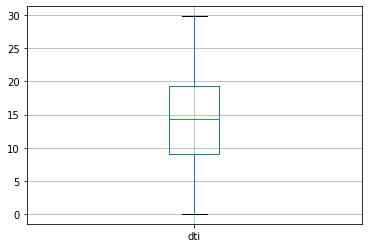

In [24]:
##start identify outliers, most of the columns in the dataframe are categorial having fixed categorial set of values so they dont qualify to check for outliers
#so calculating boxplots only for selected columns
#check outliers for dti which is ratio of debt payment to monthly income
boxplot = final_df.boxplot(column=['dti'])


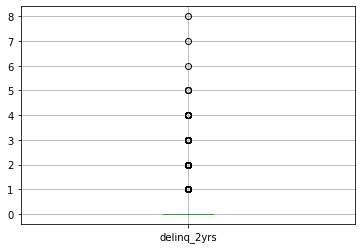

In [25]:
#values above 1 seem to be outliers but outlier records are very low as a % of total rows 39717, so not removing these outliers
#delinq_2yrs - how many times loan delinquated in 2 years
boxplot1 = final_df.boxplot(column=['delinq_2yrs'])

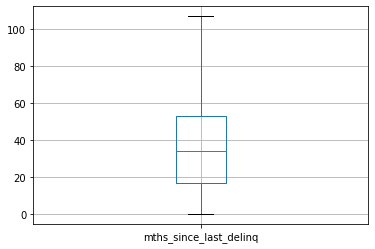

In [26]:
boxplot2 = final_df.boxplot(column=['mths_since_last_delinq'])

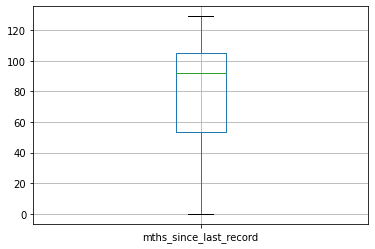

In [27]:
boxplot3 = final_df.boxplot(column=['mths_since_last_record'])

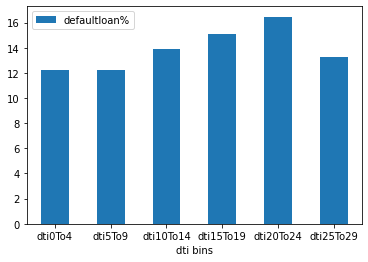

In [94]:
#dti impact on whether perticulat dti group has more % of loan defaulters
#dti is ratio of existing total monthly loan emi to monthly income
dti_df_0To4 = loan_df_withoutNA[(loan_df_withoutNA["dti"] > 0.00) & (loan_df_withoutNA["dti"] <= 4)] 
dti_df_5To9 = loan_df_withoutNA[(loan_df_withoutNA["dti"] > 5.00) & (loan_df_withoutNA["dti"] <= 9)] 
dti_df_10To14 = loan_df_withoutNA[(loan_df_withoutNA["dti"] > 10) & (loan_df_withoutNA["dti"] <= 14)] 
dti_df_15To19 = loan_df_withoutNA[(loan_df_withoutNA["dti"] > 15.00) & (loan_df_withoutNA["dti"] <= 19)] 
dti_df_20To24 = loan_df_withoutNA[(loan_df_withoutNA["dti"] > 20.00) & (loan_df_withoutNA["dti"] <= 24)] 
dti_df_25To29 = loan_df_withoutNA[(loan_df_withoutNA["dti"] > 25.00) & (loan_df_withoutNA["dti"] <= 29)] 
#dti impact on whether perticulat dti group has more % of loan defaulters
dti_df_0To4Pct = len(dti_df_0To4[dti_df_0To4['loan_status'] == 'Charged Off']) / len(dti_df_0To4) * 100
dti_df_5To9Pct =(len(dti_df_5To9[dti_df_5To9['loan_status'] == 'Charged Off']) / len(dti_df_5To9)) * 100
dti_df_10To14Pct =(len(dti_df_10To14[dti_df_10To14['loan_status'] == 'Charged Off']) / len(dti_df_10To14)) * 100
dti_df_15To19Pct =(len(dti_df_15To19[dti_df_15To19['loan_status'] == 'Charged Off']) / len(dti_df_15To19)) * 100
dti_df_20To24Pct =(len(dti_df_20To24[dti_df_20To24['loan_status'] == 'Charged Off']) / len(dti_df_20To24)) * 100
dti_df_25To29Pct =(len(dti_df_25To29[dti_df_25To29['loan_status'] == 'Charged Off']) / len(dti_df_25To29)) * 100

df = pd.DataFrame({'dti bins':['dti0To4','dti5To9','dti10To14','dti15To19','dti20To24','dti25To29'], 'defaultloan%':[dti_df_0To4Pct, dti_df_5To9Pct, dti_df_10To14Pct,dti_df_15To19Pct,dti_df_20To24Pct,dti_df_25To29Pct]})
ax = df.plot.bar(x='dti bins', y='defaultloan%', rot=0)

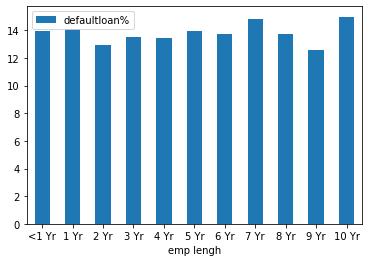

In [98]:
#dti impact on whether eomployment length has more % of loan defaulters
emplen_df_lt1 = loan_df_withoutNA[(loan_df_withoutNA["emp_length"] == "< 1 year")] 
emplen_df_1 = loan_df_withoutNA[(loan_df_withoutNA["emp_length"] == "1 year")] 
emplen_df_2 = loan_df_withoutNA[(loan_df_withoutNA["emp_length"] == "2 years")]
emplen_df_3 = loan_df_withoutNA[(loan_df_withoutNA["emp_length"] == "3 years")]
emplen_df_4 = loan_df_withoutNA[(loan_df_withoutNA["emp_length"] == "4 years")]
emplen_df_5 = loan_df_withoutNA[(loan_df_withoutNA["emp_length"] == "5 years")]
emplen_df_6 = loan_df_withoutNA[(loan_df_withoutNA["emp_length"] == "6 years")]
emplen_df_7 = loan_df_withoutNA[(loan_df_withoutNA["emp_length"] == "7 years")]
emplen_df_8 = loan_df_withoutNA[(loan_df_withoutNA["emp_length"] == "8 years")]
emplen_df_9 = loan_df_withoutNA[(loan_df_withoutNA["emp_length"] == "9 years")]
emplen_df_10 = loan_df_withoutNA[(loan_df_withoutNA["emp_length"] == "10+ years")]

#compare only charged off records against total records to calculate %
emplen_df_lt1Pct = len(emplen_df_lt1[emplen_df_lt1['loan_status'] == 'Charged Off']) / len(emplen_df_lt1) * 100
emplen_df_1Pct =(len(emplen_df_1[emplen_df_1['loan_status'] == 'Charged Off']) / len(emplen_df_1)) * 100
emplen_df_2Pct =(len(emplen_df_2[emplen_df_2['loan_status'] == 'Charged Off']) / len(emplen_df_2)) * 100
emplen_df_3Pct =(len(emplen_df_3[emplen_df_3['loan_status'] == 'Charged Off']) / len(emplen_df_3)) * 100
emplen_df_4Pct =(len(emplen_df_4[emplen_df_4['loan_status'] == 'Charged Off']) / len(emplen_df_4)) * 100
emplen_df_5Pct =(len(emplen_df_5[emplen_df_5['loan_status'] == 'Charged Off']) / len(emplen_df_5)) * 100
emplen_df_6Pct =(len(emplen_df_6[emplen_df_6['loan_status'] == 'Charged Off']) / len(emplen_df_6)) * 100
emplen_df_7Pct =(len(emplen_df_7[emplen_df_7['loan_status'] == 'Charged Off']) / len(emplen_df_7)) * 100
emplen_df_8Pct =(len(emplen_df_8[emplen_df_8['loan_status'] == 'Charged Off']) / len(emplen_df_8)) * 100
emplen_df_9Pct =(len(emplen_df_9[emplen_df_9['loan_status'] == 'Charged Off']) / len(emplen_df_9)) * 100
emplen_df_10Pct =(len(emplen_df_10[emplen_df_10['loan_status'] == 'Charged Off']) / len(emplen_df_10)) * 100

df = pd.DataFrame({'emp lengh':['<1 Yr','1 Yr','2 Yr','3 Yr','4 Yr','5 Yr','6 Yr','7 Yr','8 Yr','9 Yr','10 Yr'], 'defaultloan%':[emplen_df_lt1Pct, emplen_df_1Pct, emplen_df_2Pct,emplen_df_3Pct,emplen_df_4Pct,emplen_df_5Pct,emplen_df_6Pct,emplen_df_7Pct,emplen_df_8Pct,emplen_df_9Pct,emplen_df_10Pct]})
ax = df.plot.bar(x='emp lengh', y='defaultloan%', rot=0)

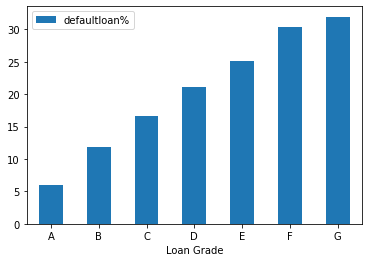

In [101]:
#loan grade impact on whether loan grade has more % of loan defaulters
loangradeA_df = loan_df_withoutNA[(loan_df_withoutNA["grade"] == "A")] 
loangradeB_df = loan_df_withoutNA[(loan_df_withoutNA["grade"] == "B")] 
loangradeC_df = loan_df_withoutNA[(loan_df_withoutNA["grade"] == "C")]
loangradeD_df = loan_df_withoutNA[(loan_df_withoutNA["grade"] == "D")]
loangradeE_df = loan_df_withoutNA[(loan_df_withoutNA["grade"] == "E")]
loangradeF_df = loan_df_withoutNA[(loan_df_withoutNA["grade"] == "F")]
loangradeG_df = loan_df_withoutNA[(loan_df_withoutNA["grade"] == "G")]


#compare only charged off records against total records to calculate %
loangradeA_df_Pct = len(loangradeA_df[loangradeA_df['loan_status'] == 'Charged Off']) / len(loangradeA_df) * 100
loangradeB_df_Pct =(len(loangradeB_df[loangradeB_df['loan_status'] == 'Charged Off']) / len(loangradeB_df)) * 100
loangradeC_df_Pct =(len(loangradeC_df[loangradeC_df['loan_status'] == 'Charged Off']) / len(loangradeC_df)) * 100
loangradeD_df_Pct =(len(loangradeD_df[loangradeD_df['loan_status'] == 'Charged Off']) / len(loangradeD_df)) * 100
loangradeE_df_Pct =(len(loangradeE_df[loangradeE_df['loan_status'] == 'Charged Off']) / len(loangradeE_df)) * 100
loangradeF_df_Pct =(len(loangradeF_df[loangradeF_df['loan_status'] == 'Charged Off']) / len(loangradeF_df)) * 100
loangradeG_df_Pct =(len(loangradeG_df[loangradeG_df['loan_status'] == 'Charged Off']) / len(loangradeG_df)) * 100


df = pd.DataFrame({'Loan Grade':['A','B','C','D','E','F','G'], 'defaultloan%':[loangradeA_df_Pct, loangradeB_df_Pct, loangradeC_df_Pct,loangradeD_df_Pct,loangradeE_df_Pct,loangradeF_df_Pct,loangradeG_df_Pct]})
ax = df.plot.bar(x='Loan Grade', y='defaultloan%', rot=0)

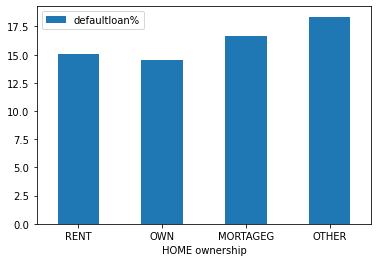

In [102]:
#home ownership impact on whether loan grade has more % of loan defaulters
RENT_df = loan_df_withoutNA[(loan_df_withoutNA["home_ownership"] == "RENT")] 
OWN_df = loan_df_withoutNA[(loan_df_withoutNA["home_ownership"] == "OWN")] 
MORTGAGE_df = loan_df_withoutNA[(loan_df_withoutNA["home_ownership"] == "MORTGAGE")]
OTHER_df = loan_df_withoutNA[(loan_df_withoutNA["home_ownership"] == "OTHER")]


#compare only charged off records against total records to calculate %
RENT_df_Pct = len(RENT_df[RENT_df['loan_status'] == 'Charged Off']) / len(RENT_df) * 100
OWN_df_Pct =(len(OWN_df[OWN_df['loan_status'] == 'Charged Off']) / len(OWN_df)) * 100
MORTGAGE_df_Pct =(len(MORTGAGE_df[MORTGAGE_df['loan_status'] == 'Charged Off']) / len(MORTGAGE_df)) * 100
OTHER_df_Pct =(len(OTHER_df[OTHER_df['loan_status'] == 'Charged Off']) / len(OTHER_df)) * 100


df = pd.DataFrame({'HOME ownership':['RENT','OWN','MORTAGEG','OTHER'], 'defaultloan%':[RENT_df_Pct, OWN_df_Pct, loangradeC_df_Pct,OTHER_df_Pct]})
ax = df.plot.bar(x='HOME ownership', y='defaultloan%', rot=0)

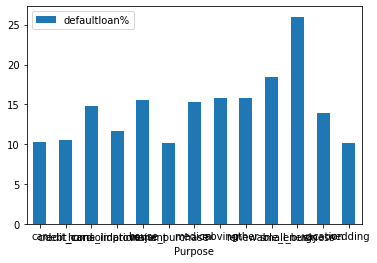

In [109]:
#Loan purpose impact on whether loan purpose has more % of loan defaulters
car_df = loan_df_withoutNA[(loan_df_withoutNA["purpose"] == "car")] 
credit_card_df = loan_df_withoutNA[(loan_df_withoutNA["purpose"] == "credit_card")] 
debt_consolidation_df = loan_df_withoutNA[(loan_df_withoutNA["purpose"] == "debt_consolidation")]
home_improvement_df = loan_df_withoutNA[(loan_df_withoutNA["purpose"] == "home_improvement")]
house_df = loan_df_withoutNA[(loan_df_withoutNA["purpose"] == "house")]
major_purchase_df = loan_df_withoutNA[(loan_df_withoutNA["purpose"] == "major_purchase")]
medical_df = loan_df_withoutNA[(loan_df_withoutNA["purpose"] == "medical")]
moving_df = loan_df_withoutNA[(loan_df_withoutNA["purpose"] == "moving")]
other_df = loan_df_withoutNA[(loan_df_withoutNA["purpose"] == "other")]
renewable_energy_df = loan_df_withoutNA[(loan_df_withoutNA["purpose"] == "renewable_energy")]
small_business_df = loan_df_withoutNA[(loan_df_withoutNA["purpose"] == "small_business")]
vacation_df = loan_df_withoutNA[(loan_df_withoutNA["purpose"] == "vacation")]
wedding_df = loan_df_withoutNA[(loan_df_withoutNA["purpose"] == "wedding")]



#compare only charged off records against total records to calculate %
car_df_Pct = len(car_df[car_df['loan_status'] == 'Charged Off']) / len(car_df) * 100
credit_card_df_Pct =(len(credit_card_df[credit_card_df['loan_status'] == 'Charged Off']) / len(credit_card_df)) * 100
debt_consolidation_df_Pct =(len(debt_consolidation_df[debt_consolidation_df['loan_status'] == 'Charged Off']) / len(debt_consolidation_df)) * 100
home_improvement_df_Pct =(len(home_improvement_df[home_improvement_df['loan_status'] == 'Charged Off']) / len(home_improvement_df)) * 100
house_df_Pct =(len(house_df[house_df['loan_status'] == 'Charged Off']) / len(house_df)) * 100
major_purchase_df_Pct =(len(major_purchase_df[major_purchase_df['loan_status'] == 'Charged Off']) / len(major_purchase_df)) * 100
medical_df_Pct =(len(medical_df[medical_df['loan_status'] == 'Charged Off']) / len(medical_df)) * 100
moving_df_Pct =(len(moving_df[moving_df['loan_status'] == 'Charged Off']) / len(moving_df)) * 100
other_df_Pct =(len(other_df[other_df['loan_status'] == 'Charged Off']) / len(other_df)) * 100
renewable_energy_df_Pct =(len(renewable_energy_df[renewable_energy_df['loan_status'] == 'Charged Off']) / len(renewable_energy_df)) * 100
small_business_df_Pct =(len(small_business_df[small_business_df['loan_status'] == 'Charged Off']) / len(small_business_df)) * 100
vacation_df_Pct =(len(vacation_df[vacation_df['loan_status'] == 'Charged Off']) / len(vacation_df)) * 100
wedding_df_Pct =(len(wedding_df[wedding_df['loan_status'] == 'Charged Off']) / len(wedding_df)) * 100

df = pd.DataFrame({'Purpose':['car','credit_card','debt_consolidation','home_improvement','house','major_purchase','medical','moving','other','renewable_energy','small_business','vacation','wedding'], 'defaultloan%':[car_df_Pct, credit_card_df_Pct, debt_consolidation_df_Pct,home_improvement_df_Pct,house_df_Pct,major_purchase_df_Pct,medical_df_Pct,moving_df_Pct,other_df_Pct,renewable_energy_df_Pct,small_business_df_Pct,vacation_df_Pct,wedding_df_Pct]})

ax = df.plot.bar(x='Purpose', y='defaultloan%', rot=0, )